In [1]:
import pandas as pd
import src.funciones_toni as tn
import re
import numpy as np
import seaborn as sns
shark = pd.read_csv("shark_clean",encoding = "ISO-8859-1")

In [2]:
shark.head()

,Unnamed: 0,Year,Month_attack,Time,Type,Activity,Country,Area,Location,Sex,Age,Injury,Fatal (Y/N),Species_sorted
0,0,2018.0,Jun,Evening,Boating,Paddling,USA,California,"Oceanside, San Diego County",F,57,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,1,2018.0,Jun,Afternoon,Unprovoked,Standing,USA,Georgia,"St. Simon Island, Glynn County",F,11,Minor injury to left thigh,N,NaN
2,2,2018.0,Jun,Morning,Invalid,Surfing,USA,Hawaii,"Habush, Oahu",M,48,Injury to left lower leg from surfboard skeg,N,NaN
3,3,2018.0,Jun,NaN,Unprovoked,Surfing,AUSTRALIA,New South Wales,Arrawarra Headland,M,0,Minor injury to lower leg,N,NaN
4,4,2018.0,Jun,NaN,Provoked,Free diving,MEXICO,Colima,La Ticla,M,0,Lacerations to leg & hand shark PROVOKED INCIDENT,N,Tiger shark


Before starting analysing the data it's good to make a quick table checking, to see if everything is ok.

In [3]:
shark.columns

Index(['Unnamed: 0', 'Year', 'Month_attack', 'Time', 'Type', 'Activity',
       'Country', 'Area', 'Location', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)',
       'Species_sorted'],
      dtype='object')

I remove the "Index" column imported from the csv file.

In [4]:
shark=shark.drop(columns=['Unnamed: 0'])


In [5]:
shark.dtypes

Year              float64
Month_attack       object
Time               object
Type               object
Activity           object
Country            object
Area               object
Location           object
Sex                object
Age                 int64
Injury             object
Fatal (Y/N)        object
Species_sorted     object
dtype: object

First I want to check how is the profile of the shark victims.

In [6]:
test = shark[shark["Age"] != 0]

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

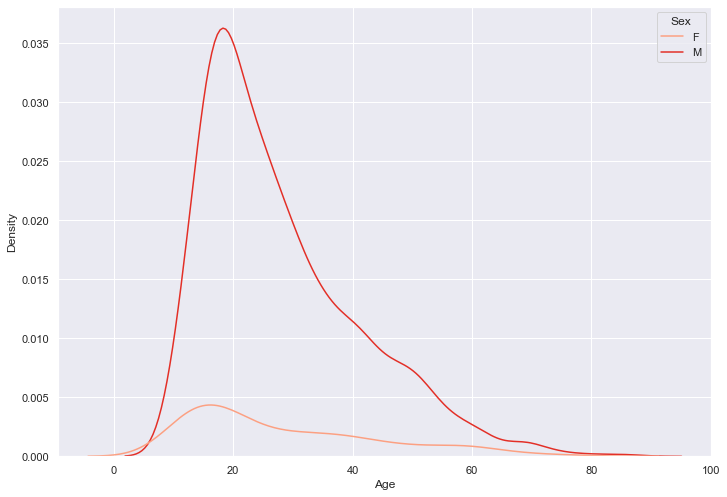

In [8]:
plot=sns.kdeplot(x=test.Age, hue= test.Sex, palette="Reds")

In [9]:
fig=plot.get_figure()
fig.savefig("01_victims.png") 

The favourite shark victims are young males, probably while they are dping some kind of sport.

In [10]:
test['Activity'].value_counts(dropna=True).head(10)


Surfing          765
Swimming         529
Spearfishing     219
Fishing          128
Wading           108
Standing          71
Snorkeling        64
Body boarding     55
Bathing           51
Scuba diving      50
Name: Activity, dtype: int64

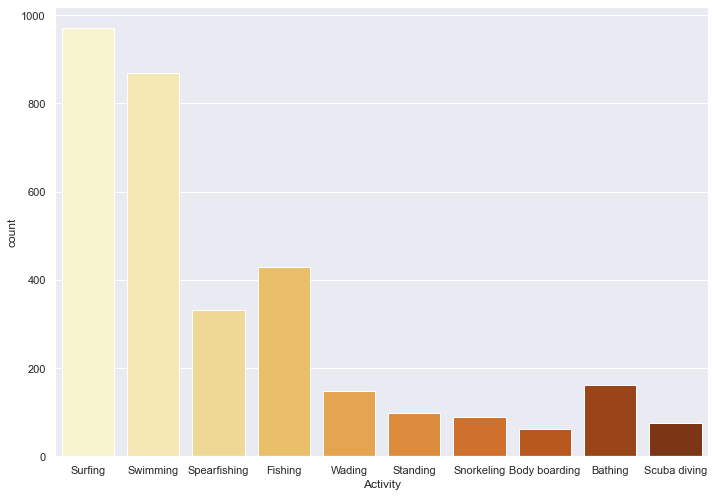

In [11]:
plot2=sns.countplot(x=shark["Activity"], order=["Surfing", "Swimming", "Spearfishing", "Fishing", "Wading", "Standing", "Snorkeling", "Body boarding","Bathing","Scuba diving"], palette="YlOrBr")
fig=plot2.get_figure()
fig.savefig("02_Activities.png") 

Shorting the values from the "Activity column we can confirm that most of the victims were practising some kind of sport.

From the column "Time" it can be observed that there are more shark attacks during the afternoon, probably because there are more victims practising sports during that hours. During the night sharks and people are sleeping...

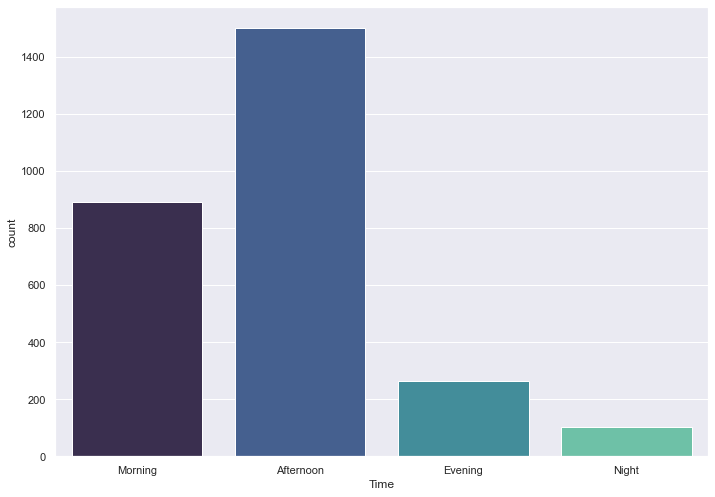

In [12]:
plot3=sns.countplot(x=shark["Time"], order=["Morning", "Afternoon", "Evening", "Night"], palette="mako")
fig=plot3.get_figure()
fig.savefig("03_Daytime.png") 

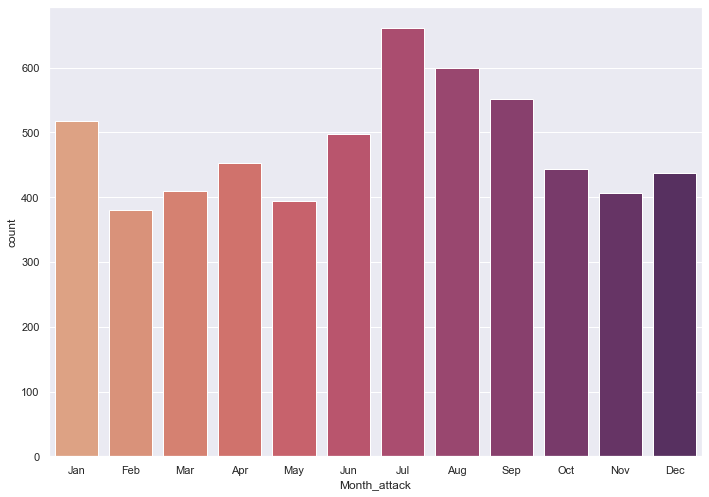

In [13]:
plot4=sns.countplot(x=shark["Month_attack"], order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], palette="flare")
fig=plot4.get_figure()
fig.savefig("04_Months.png") 

Plotting the number of attacks per month as above can give some errors. As the data is recorded from all around the world there are Countries in both hemisferes. Thus, plotting the attacks regarding the month and the countries will bring more usefull information. 

In [14]:
shark.Country.value_counts(dropna=True).head(10)

USA                 2227
AUSTRALIA           1335
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
Name: Country, dtype: int64

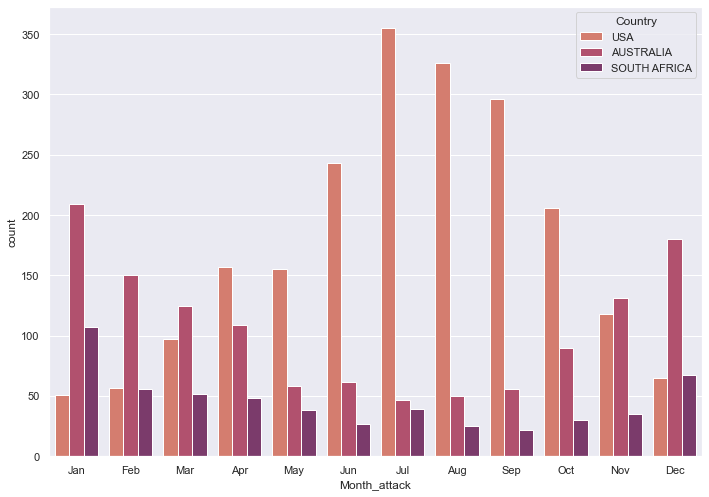

In [15]:
plot5=sns.countplot(x=shark["Month_attack"], hue=shark["Country"], order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], hue_order=["USA", "AUSTRALIA", "SOUTH AFRICA"], palette="flare")
fig=plot5.get_figure()
fig.savefig("05_Months_vs_country.png") 

USA, Australia and South Africa are the countries with more attacks. We can see that the attacks in the USA (Norht hemisphere) are mostly concentrated during the summer time, and in Australia and South Africa (South Hemisphere) are in the south summer time as well.
During the warm months there is more activity in the seaside, and thus, more attacks are recorded.
I'm not an expert in sharks, so I don't know if sharks migrate, but they could move from north to south during the warm months.

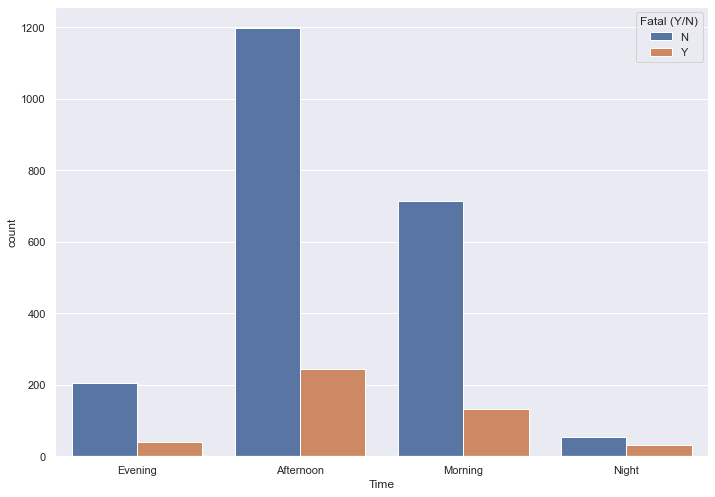

In [16]:
plot6=sns.countplot(x=shark["Time"], hue=shark["Fatal (Y/N)"])
fig=plot6.get_figure()
fig.savefig("06_Daytime_vs_Fatal.png") 

There is no relation between daytime and fatal attacks, so sharks are not more agressive depending on the hour.

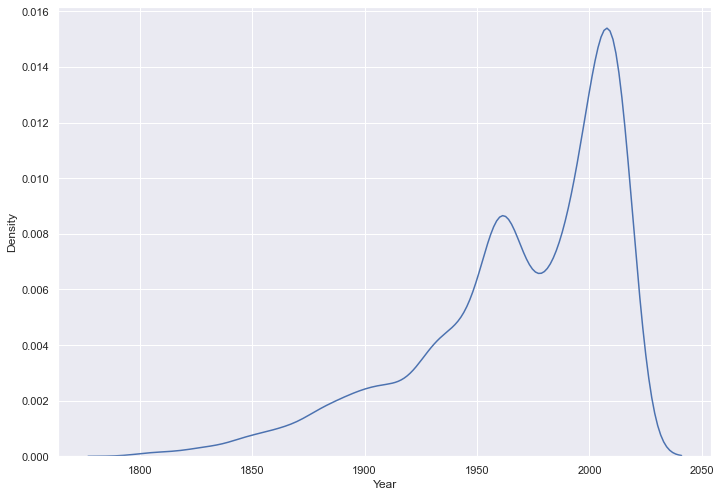

In [17]:
subshark = shark[shark["Year"] >= 1800]
plot7=sns.kdeplot(x=subshark.Year)
fig=plot7.get_figure()
fig.savefig("07_Attacks_year.png") 

The number of attacks/year is raising each year, probably because is easier to track and record every attack. There is a decrease in shark attacks around 1975, just when the movie Jaws was released, this is probably just a coincidence.

Now I'd like to see if there are some sharks more deadly than others, I'm going to cross the columns Fatal(Y/N) and the one with the species. 
As there are lots of different species in the list, I'm going to select the ones with most encounters.

In [18]:
shark.Species_sorted.value_counts(dropna=True).head(30)

White shark          436
Tiger shark          237
5' shark             131
Bull shark           130
6' shark             104
4' shark              98
8' shark              51
Nurse shark           49
Wobbegong shark       46
3' shark              44
Mako shark            44
Raggedtooth shark     43
10' shark             41
12' shark             40
7' shark              36
Blacktip shark        34
Lemon shark           32
Zambesi shark         29
Blue shark            29
No shark              23
Hammerhead shark      22
14' shark             20
9' shark              17
13' shark             15
Sandtiger shark       14
15' shark             13
Spinner shark         13
2' shark               8
20' shark              8
75' shark              8
Name: Species_sorted, dtype: int64

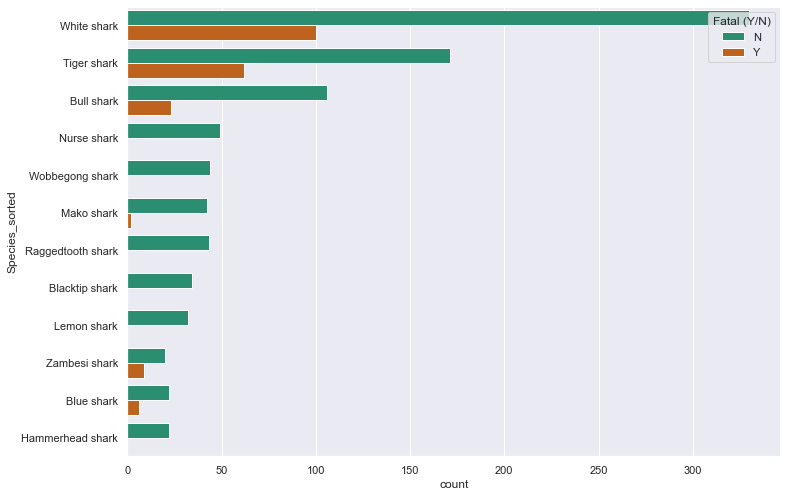

In [19]:
plot8=sns.countplot(y=shark["Species_sorted"], hue=shark["Fatal (Y/N)"], order=["White shark", "Tiger shark", "Bull shark", "Nurse shark", "Wobbegong shark", "Mako shark", "Raggedtooth shark", "Blacktip shark", "Lemon shark", "Zambesi shark", "Blue shark", "Hammerhead shark"], palette="Dark2")
fig=plot8.get_figure()
fig.savefig("08_Fatal_shark_attacks.png") 

This graph brings some interesting information.
The most common attacks are performed by white sharks, tiger sharks and bull sharks, being the first one the most active. Also, if you are attacked by one of that sharks, you have chance to survive around the 75%. Good news, a shark attack is not always letal!
There are some species, as the nurse shark, the wobbegong shark, whose attacks are not letal for humans.

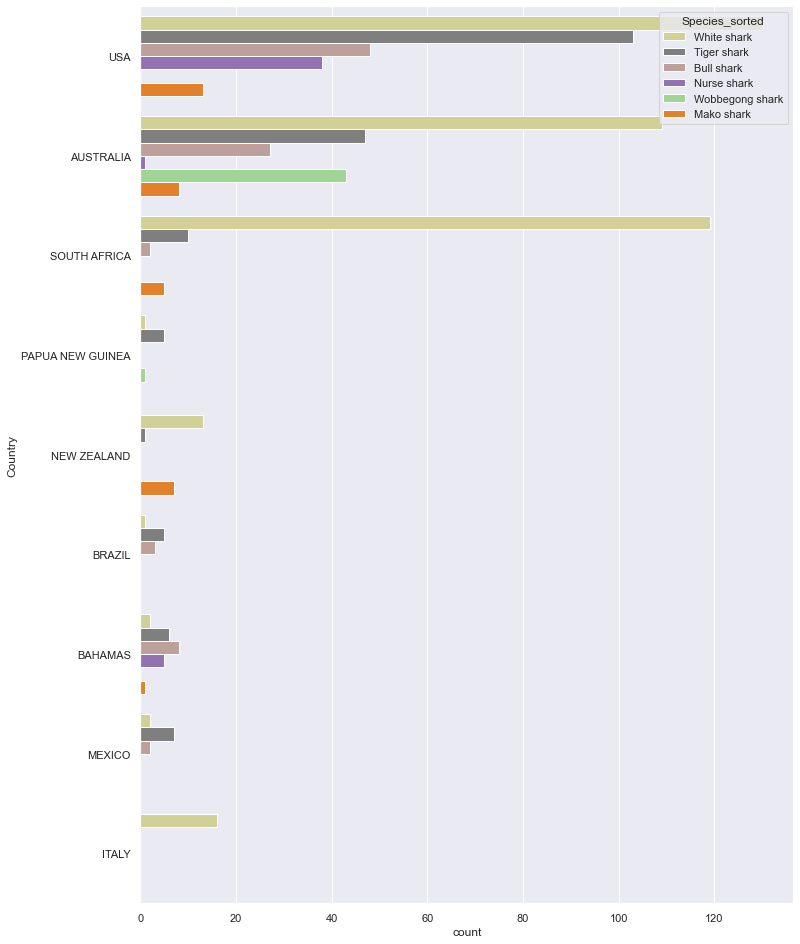

In [20]:
sns.set(rc={'figure.figsize':(11.7,16.5)})
plot9=sns.countplot(hue=shark["Species_sorted"], y=shark["Country"], hue_order=["White shark", "Tiger shark", "Bull shark", "Nurse shark", "Wobbegong shark", "Mako shark"], order=["USA", "AUSTRALIA", "SOUTH AFRICA", "PAPUA NEW GUINEA", "NEW ZEALAND", "BRAZIL", "BAHAMAS", "MEXICO", "ITALY"], palette="tab20_r")
fig=plot9.get_figure()
fig.savefig("09_Species_vs_country.png") 

Sorting the shark species by countries where they attacked we can see that species are located in different areas, for exmple, White shark, Tiger shark and Bull shark attacks are mostly in countries with coasts in the Pacific Ocean, while the Atlantic Ocean looks a bit more safe from shark attacks.

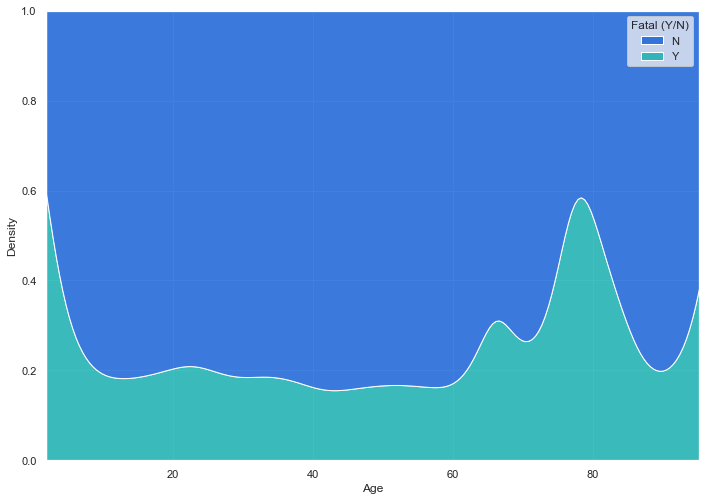

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot10=sns.kdeplot(x=test["Age"], hue= test["Fatal (Y/N)"], palette="winter", multiple="fill")
fig=plot10.get_figure()
fig.savefig("10_Survival_Age.png") 

The survival chances are reduced when the victim is either too young or older than 60 yrs. The strenght and speed of the victim can be the cause, when the time to fight with a shark comes...